任務: 基於**zgpa_train.csv**數據，建立RNN模型預測股價:
1. 完成數據預處理，將序列數據轉化為可用於RNN輸入的數據
1. 對新數據**zgpa_test.csv**進行預測，可視化結果
1. 存儲預測結果，並觀察局部預測結構

模型結構：單層RNN，輸出有5個神經元；每次使用前8個數據預測第9個數據

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv("zgpa_train.csv")
data.head()

,date,open,high,low,close,volume
0,2016-01-04,30.57,30.57,28.63,28.78,70997200
1,2016-01-05,28.41,29.54,28.23,29.23,87498504
2,2016-01-06,29.03,29.39,28.73,29.26,48012112
3,2016-01-07,28.73,29.25,27.73,28.50,23647604
4,2016-01-08,28.73,29.18,27.63,28.67,98239664


In [2]:
price = data.loc[:,'close']
price.head()

0    28.78
1    29.23
2    29.26
3    28.50
4    28.67
Name: close, dtype: float64

In [3]:
# 归一化处理
price_norm = price/max(price)
print(price_norm)

0      0.383273
1      0.389266
2      0.389666
3      0.379545
4      0.381808
         ...   
726    0.751099
727    0.750566
728    0.738447
729    0.733120
730    0.722466
Name: close, Length: 731, dtype: float64


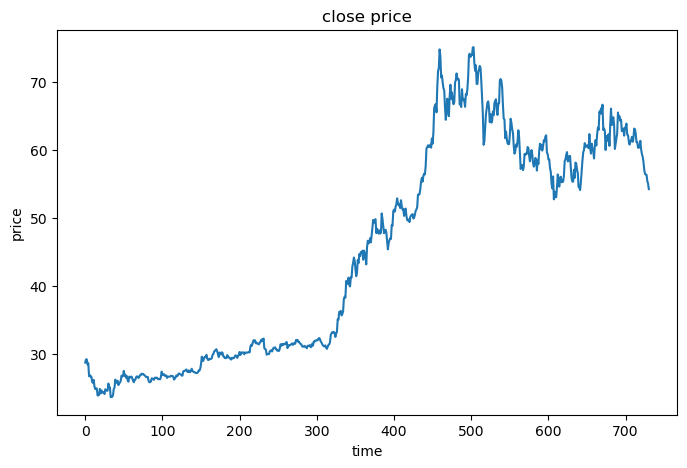

In [4]:
# 绘制曲线
from matplotlib import pyplot as plt
fig1 = plt.figure(figsize=(8,5))
plt.plot(price)
plt.title("close price")
plt.xlabel("time")
plt.ylabel("price")
plt.show()

In [5]:
# define X and y
# define method to extract X and y
# 提取数据队列
def extract_data(data,time_step):
    X = []
    y = []
    #0,1,2,3....9 :10个样本 time_step=8; 0-7,1-8,2-9 三组
    for i in range(len(data) - time_step ):
        X.append([a for a in data[i:i+time_step]])
        y.append(data[i+time_step])
    X = np.array(X)
    X = X.reshape(X.shape[0],X.shape[1],1) # 维度1
    return X,y

In [6]:
time_step = 8
# define X and y
X,y = extract_data(price_norm,time_step)
print(X.shape)

(723, 8, 1)


In [7]:
print(X[0,:,:]) # 第一个样本
print(y[0])

[[0.38327341]
 [0.38926621]
 [0.38966573]
 [0.37954455]
 [0.3818085 ]
 [0.35637235]
 [0.35876948]
 [0.35583966]]
0.3558396590757757


In [8]:
# set uo the model
from keras.models import Sequential
from keras.layers import Dense,SimpleRNN
model = Sequential()
# add RNN model
model.add(SimpleRNN(units=5,input_shape=(time_step,1),activation="relu")) # input_shape 训练长度 每个数据的维度
# add output layer
model.add(Dense(units=1, activation="linear")) # "linear"线性模型
# configure the model
model.compile(optimizer="adam",loss="mean_squared_error")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 5)                 35        
                                                                 
 dense (Dense)               (None, 1)                 6         
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [9]:
# train the model
model.fit(X,np.array(y),batch_size=30,epochs=200)

Epoch 1/200
25/25 [==============================] - 1s 2ms/step - loss: 0.0497
Epoch 2/200
25/25 [==============================] - 0s 2ms/step - loss: 0.0024
Epoch 3/200
25/25 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 4/200
25/25 [==============================] - 0s 2ms/step - loss: 9.5550e-04
Epoch 5/200
25/25 [==============================] - 0s 2ms/step - loss: 8.7036e-04
Epoch 6/200
25/25 [==============================] - 0s 2ms/step - loss: 8.1757e-04
Epoch 7/200
25/25 [==============================] - 0s 2ms/step - loss: 7.4246e-04
Epoch 8/200
25/25 [==============================] - 0s 2ms/step - loss: 6.8704e-04
Epoch 9/200
25/25 [==============================] - 0s 2ms/step - loss: 6.2854e-04
Epoch 10/200
25/25 [==============================] - 0s 2ms/step - loss: 6.0190e-04
Epoch 11/200
25/25 [==============================] - 0s 2ms/step - loss: 5.5824e-04
Epoch 12/200
25/25 [==============================] - 0s 2ms/step - loss: 5.2867e-04
E

25/25 [==============================] - 0s 2ms/step - loss: 4.0047e-04
Epoch 98/200
25/25 [==============================] - 0s 2ms/step - loss: 3.9096e-04
Epoch 99/200
25/25 [==============================] - 0s 2ms/step - loss: 3.9888e-04
Epoch 100/200
25/25 [==============================] - 0s 2ms/step - loss: 4.1414e-04
Epoch 101/200
25/25 [==============================] - 0s 2ms/step - loss: 3.9508e-04
Epoch 102/200
25/25 [==============================] - 0s 2ms/step - loss: 3.9380e-04
Epoch 103/200
25/25 [==============================] - 0s 2ms/step - loss: 3.8924e-04
Epoch 104/200
25/25 [==============================] - 0s 2ms/step - loss: 3.9955e-04
Epoch 105/200
25/25 [==============================] - 0s 2ms/step - loss: 3.9213e-04
Epoch 106/200
25/25 [==============================] - 0s 2ms/step - loss: 4.1358e-04
Epoch 107/200
25/25 [==============================] - 0s 2ms/step - loss: 4.1782e-04
Epoch 108/200
25/25 [==============================] - 0s 2ms/step - l

25/25 [==============================] - 0s 2ms/step - loss: 3.3136e-04
Epoch 193/200
25/25 [==============================] - 0s 2ms/step - loss: 3.1551e-04
Epoch 194/200
25/25 [==============================] - 0s 2ms/step - loss: 3.2058e-04
Epoch 195/200
25/25 [==============================] - 0s 2ms/step - loss: 3.1112e-04
Epoch 196/200
25/25 [==============================] - 0s 2ms/step - loss: 3.6548e-04
Epoch 197/200
25/25 [==============================] - 0s 2ms/step - loss: 3.2616e-04
Epoch 198/200
25/25 [==============================] - 0s 2ms/step - loss: 3.7704e-04
Epoch 199/200
25/25 [==============================] - 0s 2ms/step - loss: 3.0991e-04
Epoch 200/200
25/25 [==============================] - 0s 2ms/step - loss: 3.1048e-04


In [10]:
# make prediction based on the training data
y_train_predict = model.predict(X) * max(price)
y_train = [i*max(price) for i in y]#归一化数据转换回来

23/23 [==============================] - 0s 1ms/step


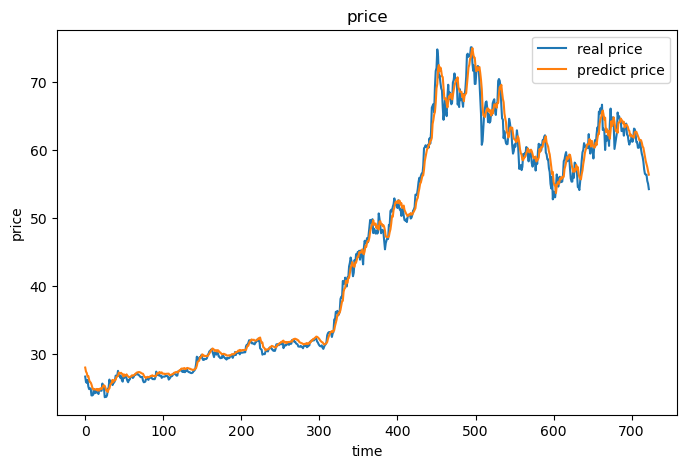

In [11]:
fig2 = plt.figure(figsize=(8,5))
plt.plot(y_train,label="real price")
plt.plot(y_train_predict,label="predict price")
plt.title("price")
plt.xlabel("time")
plt.ylabel("price")
plt.legend()
plt.show()

In [12]:
# 生成数据
# 本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2
import tushare as ts 
# 读取中国平安（601318）数据
zgpa = ts.get_hist_data('601318', start='2022-01-01', end='2022-12-1')
# 查看数据前5行
zgpa.head()
# 输出数据
# zgpa.to_csv('zgpa_test.csv')

本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
date,,,,,,,,,,,,,,
2022-12-09,47.07,47.88,47.60,46.70,709578.88,0.45,0.95,47.234,45.676,43.869,849621.35,914375.63,753374.44,0.66
2022-12-08,46.38,47.20,47.15,46.30,448364.06,0.45,0.96,46.638,45.191,43.505,829263.00,903213.72,770229.27,0.41
2022-12-07,47.44,47.48,46.70,46.37,831454.75,-0.74,-1.56,46.174,44.656,43.071,911455.49,883284.96,763969.84,0.77
2022-12-06,47.28,47.68,47.44,46.74,878273.06,0.16,0.34,45.824,44.163,42.654,978167.71,845101.53,735781.44,0.81
2022-12-05,45.55,47.31,47.28,45.35,1380436.00,2.66,5.96,45.292,43.616,42.217,1153154.05,804455.59,710391.92,1.27


In [13]:
# 预测 测试数据
# data_test = zgpa
data_test = pd.read_csv('zgpa_test.csv')
data_test.head()
price_test = data_test.loc[:,'close']
price_test.head()

0    47.60
1    47.15
2    46.70
3    47.44
4    47.28
Name: close, dtype: float64

In [14]:
# extract X_test and y_test
price_test_norm = price_test/max(price)
X_test_norm,y_test_norm = extract_data(price_test_norm,time_step)
print(X_test_norm.shape,len(y_test_norm))

(219, 8, 1) 219


In [15]:
y_test_predict = model.predict(X_test_norm) * max(price)
y_test = [i*max(price) for i in y_test_norm]#

7/7 [==============================] - 0s 1ms/step


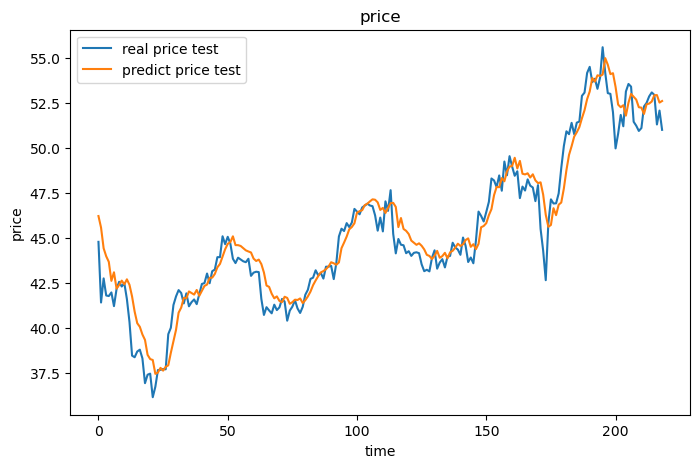

In [16]:
fig3 = plt.figure(figsize=(8,5))
plt.plot(y_test,label = "real price test")
plt.plot(y_test_predict,label = "predict price test")
plt.title("price")
plt.xlabel("time")
plt.ylabel("price")
plt.legend()
plt.show()

In [17]:
result_y_test = np.array(y_test).reshape(-1,1) # 若干行,一列
result_y_test_predict = y_test_predict
print(result_y_test.shape,result_y_test_predict.shape)
result = np.concatenate((result_y_test,result_y_test_predict),axis=1) # 把兩個數組合并到一起
print(result.shape)
reslut = pd.DataFrame(result,columns=['real_predict_test','predict_price_test'])
reslut.to_csv("zgpa_predict.csv")

(219, 1) (219, 1)
(219, 2)


RNN預測股價實戰summary：
1. 通過搭建RNN模型，實現了基於歷史數據對次日股價的預測
1. 熟悉了RNN模型的數據格式結構
1. 掌握了數字序列的數據預處理方法
1. 實現了預測數據儲存，通過可視化局部細節瞭解到RNN用於股價預測的局限性: 信息延遲(大體走勢吻合，但是具體第二天在跌的時候預測還在升然後才跌)
1. RNN模型參考資料： https://keras.io/api/layers/recurrent_layers/simple_rnn/